In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("BostonHousing.csv")

In [18]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [20]:
df = df.rename(columns={'crim':'crime_rate','zn':'res_land_pct','indus':'indus_land_pct','chas':'near_river','nox':'air_pollution','rm':'avg_rooms','dis':'dist_to_job','rad':'highway_access','ptratio':'pupil_teacher','b':'black_prop_index','lstat':'lower_status_pct','medv':'house_price'})

In [21]:
df.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
df.shape

(506, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   crime_rate        506 non-null    float64
 1   res_land_pct      506 non-null    float64
 2   indus_land_pct    506 non-null    float64
 3   near_river        506 non-null    int64  
 4   air_pollution     506 non-null    float64
 5   avg_rooms         501 non-null    float64
 6   age               506 non-null    float64
 7   dist_to_job       506 non-null    float64
 8   highway_access    506 non-null    int64  
 9   tax               506 non-null    int64  
 10  pupil_teacher     506 non-null    float64
 11  black_prop_index  506 non-null    float64
 12  lower_status_pct  506 non-null    float64
 13  house_price       506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [24]:
df.describe()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.isna().sum()

crime_rate          0
res_land_pct        0
indus_land_pct      0
near_river          0
air_pollution       0
avg_rooms           5
age                 0
dist_to_job         0
highway_access      0
tax                 0
pupil_teacher       0
black_prop_index    0
lower_status_pct    0
house_price         0
dtype: int64

In [27]:
df['avg_rooms'] = df['avg_rooms'].fillna(df['avg_rooms'].mean()) 

In [28]:
df.isna().sum()

crime_rate          0
res_land_pct        0
indus_land_pct      0
near_river          0
air_pollution       0
avg_rooms           0
age                 0
dist_to_job         0
highway_access      0
tax                 0
pupil_teacher       0
black_prop_index    0
lower_status_pct    0
house_price         0
dtype: int64

<Axes: >

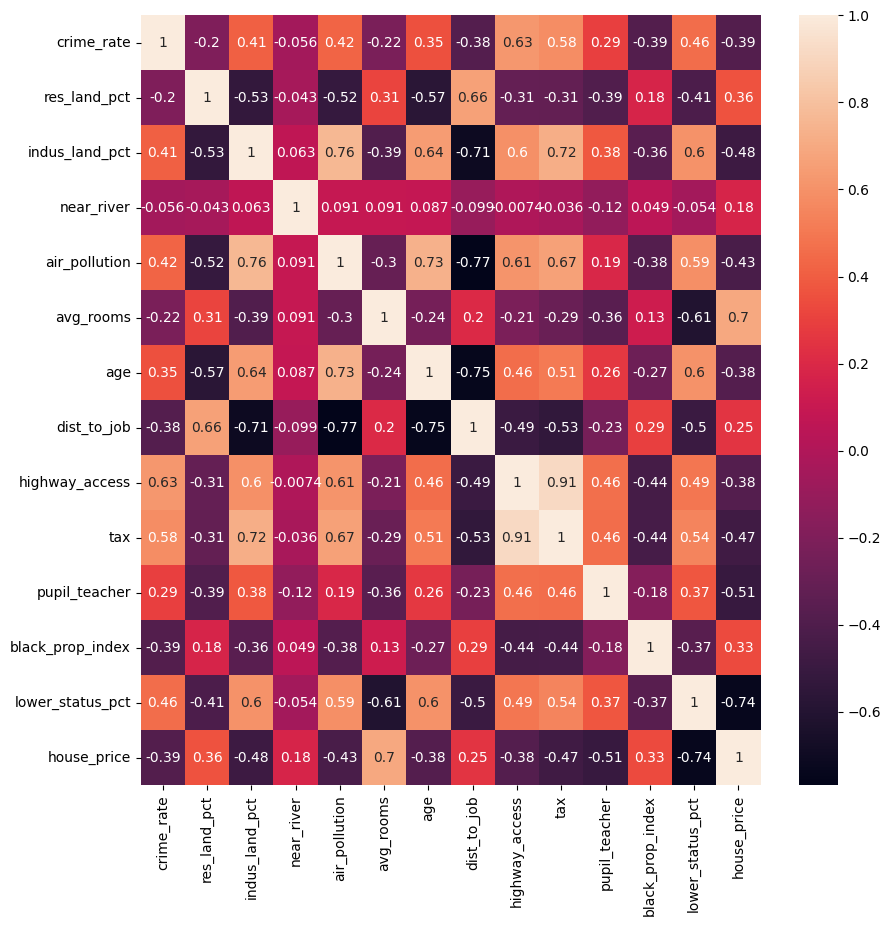

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [31]:
df.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
df['near_river'] = df['near_river'].astype('category')

<Axes: ylabel='res_land_pct'>

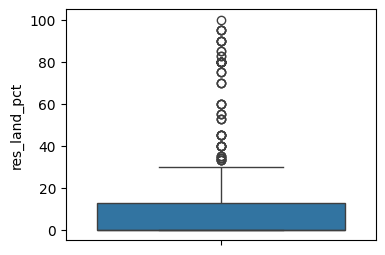

In [32]:
plt.figure(figsize=(4,3))
sns.boxplot(df['res_land_pct'])

In [36]:
#removing outlier
def oulier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)

    iqr = q3 - q1

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

In [37]:
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns

In [38]:
numeric_col

Index(['crime_rate', 'res_land_pct', 'indus_land_pct', 'air_pollution',
       'avg_rooms', 'age', 'dist_to_job', 'highway_access', 'tax',
       'pupil_teacher', 'black_prop_index', 'lower_status_pct', 'house_price'],
      dtype='object')